In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/crt/CMG.csv"
df = pd.read_csv(file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Price,Open,High,Low,Class
0,39000.0,38900.0,39000.0,38600.0,1
1,38900.0,38400.0,39000.0,38350.0,1
2,38900.0,39050.0,39050.0,37000.0,1
3,39000.0,38300.0,39000.0,38300.0,1
4,38850.0,38350.0,38950.0,38300.0,1
...,...,...,...,...,...
1739,9321.7,8978.7,9321.7,8978.7,0
1740,9415.2,9664.6,9664.6,9228.1,0
1741,9352.8,9352.8,9352.8,9352.8,0
1742,9352.8,9352.8,9352.8,9352.8,0


In [50]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Class', axis=1))
scaled_features = scaler.transform(df.drop('Class',
                                           axis=1))

df_feat = pd.DataFrame(scaled_features,
                       columns=df.columns[:-1])
df_feat.head()

,Price,Open,High,Low
0,0.668172,0.665797,0.632189,0.705458
1,0.661028,0.630009,0.632189,0.687104
2,0.661028,0.676533,0.635722,0.587996
3,0.668172,0.622852,0.632189,0.683434
4,0.657455,0.626431,0.628655,0.683434


Ratio 7-3

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                       df['Class'],
                                       test_size=0.3)



knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[313   0]
 [  1 210]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       211

    accuracy                           1.00       524
   macro avg       1.00      1.00      1.00       524
weighted avg       1.00      1.00      1.00       524



In [52]:
print(f"Accuraccy Precent: \n {accuracy_score(y_test,pred)*100}\n\n\n")

Accuraccy Precent: 
 99.80916030534351





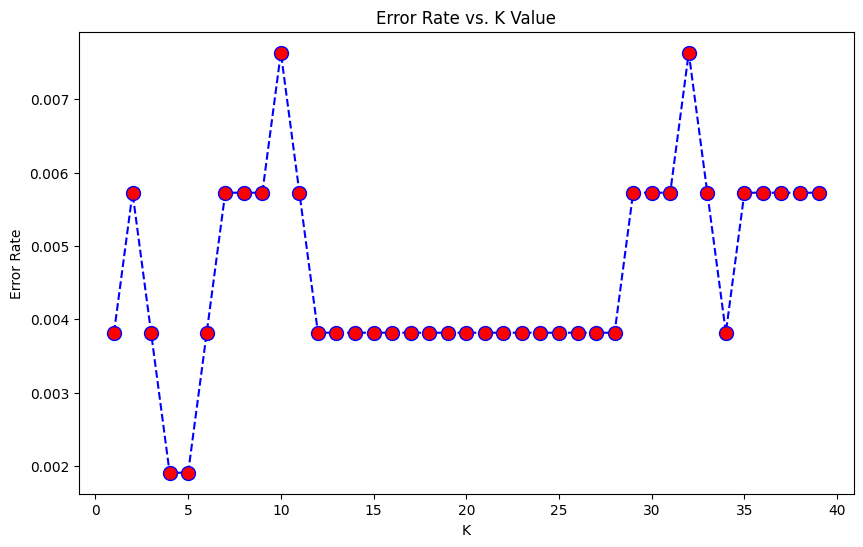

In [53]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [54]:
# Find the best k value
best_k = np.argmin(error_rate) + 1
print("Best k:", best_k)

Best k: 4


Ratio 8-2

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                       df['Class'],
                                       test_size=0.2)



knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[201   0]
 [  2 146]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       201
           1       1.00      0.99      0.99       148

    accuracy                           0.99       349
   macro avg       1.00      0.99      0.99       349
weighted avg       0.99      0.99      0.99       349



In [60]:
print(f"Accuraccy Precent: \n {accuracy_score(y_test,pred)*100}\n\n\n")

Accuraccy Precent: 
 99.42693409742121





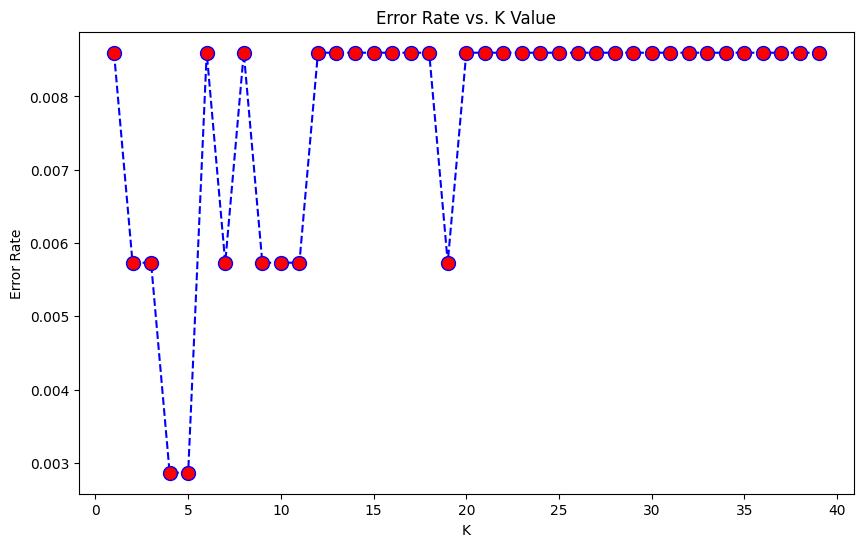

In [57]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [58]:
# Find the best k value
best_k = np.argmin(error_rate) + 1
print("Best k:", best_k)

Best k: 4


Ratio 9-1

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                       df['Class'],
                                       test_size=0.1)



knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[99  0]
 [ 0 76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        76

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [62]:
print(f"Accuraccy Precent: \n {accuracy_score(y_test,pred)*100}\n\n\n")

Accuraccy Precent: 
 100.0





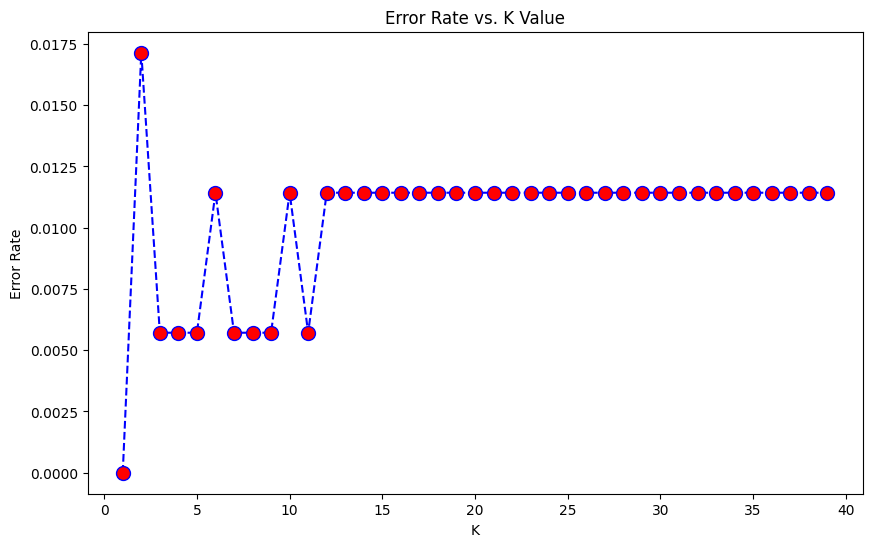

In [63]:
error_rate = []

# Will take some time
for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [64]:
# Find the best k value
best_k = np.argmin(error_rate) + 1
print("Best k:", best_k)

Best k: 1
